In [10]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

$c_j = \sum_{k \neq j} \alpha_{j,k} r_k$

$p(z∣r)= \prod_{k=1}^{|z|}  p(z 
k
​
 ∣z 
<k
​
 ,r)    $
​


## Realizar carga de imagenes
- Se tiene en cuenta que las imágenes han sido cargadas en orden BGR

In [11]:
img = cv.imread('Material_TPs\TP1\coord_cromaticas\CoordCrom_1.png')
img2 = cv.imread('Material_TPs\TP1\coord_cromaticas\CoordCrom_2.png')
img3 = cv.imread('Material_TPs\TP1\coord_cromaticas\CoordCrom_3.png')

# Definir la función de algoritmo de coordenadas cromaticas
- Dentro de la función se transforma la imagen que recibe como parametro en formato RGB, se procede a sacar cada uno de sus canales con la función split()
- se procede a hallar el valor de los nuevos canales rgb (siguiente formula) y se usa la función merge para ponerlos en una sola imagen

$$(R, G, B) = \left(\frac{R}{R+G+B}, \frac{G}{R+G+B}, \frac{B}{R+G+B}\right)$$

In [12]:
def coor_cromaticas(img):
    img2 = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    R, G, B = cv.split(img2)

    # se deben convertir RGB a flotantes o el resultado será una división de enteros
    R = np.float64(R)
    G = np.float64(G)
    B = np.float64(B)


    #utilizo where() para indicar que donde el denominador valga cero le deje un valor de 0.5
    denominador = np.where((R + G + B)==0, 0.5, R + G + B)

    # utilizamos la función where() para indicar que donde el denominador sea 0.5 el resultante sea 0
    r = np.where(denominador == 0.5, 0, np.round(255 * (R / denominador))).astype(np.uint8)
    g = np.where(denominador == 0.5, 0, np.round(255 * (G / denominador))).astype(np.uint8)
    b = np.where(denominador == 0.5, 0, np.round(255 * (B / denominador))).astype(np.uint8)

    # se concatenan los tres canales resultantes 
    img3 = cv.merge((r, g, b))

    
    fig, axs = plt.subplots(1, 2, figsize=(10,5))
    axs[0].imshow(img2)
    axs[0].set_title('Imagen original')
    axs[1].imshow(img3)
    axs[1].set_title('Imagen con coordenadas cromáticas')
    plt.show()


# Observaciones
- para evitar warnings de valores incorrectos en el denominador R + G + B (no especifica netamente que sean cero), fue necesario utilizar la función where() para que cada denominador que detectara en 0 lo marcara con 0.5, asi el resultante (r,g,b) utilizamos where() para que todos los resultantes con denominador 0.5 los dejara en 0
- El algoritmo de coordenadas cromáticas con la operación de normalización muestra tres imágenes parecidas, aunque con una ligera diferencia con la imagen de más alto contraste

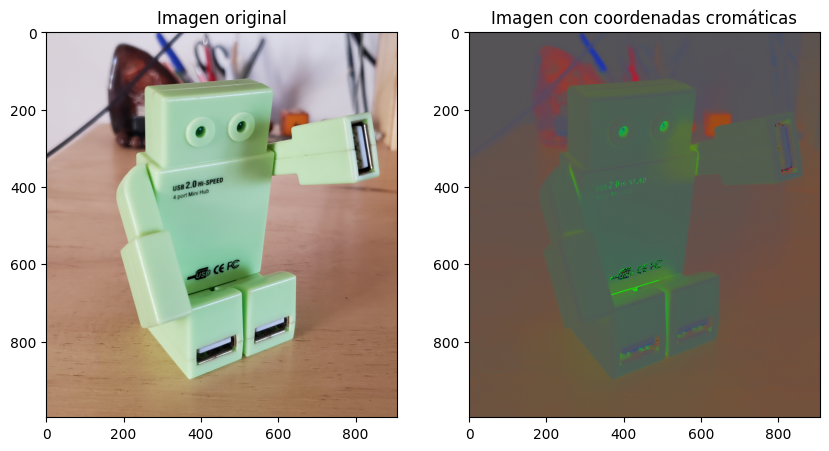

In [13]:
#IMAGEN 1
coor_cromaticas(img)

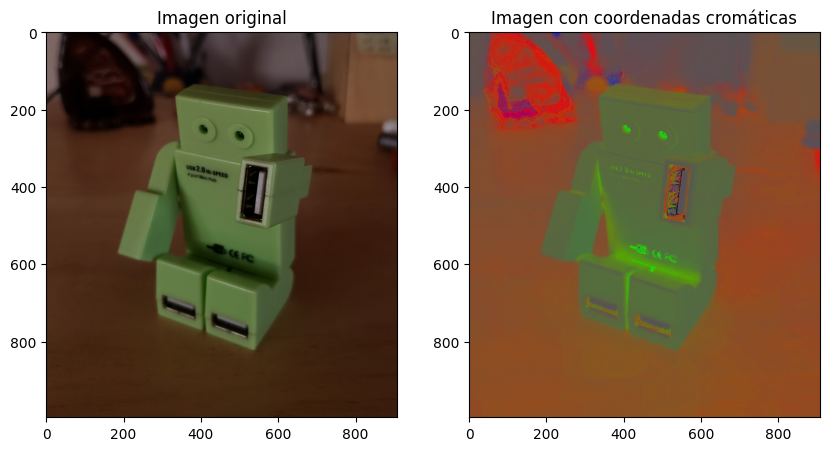

In [14]:
#IMAGEN 2
coor_cromaticas(img2)

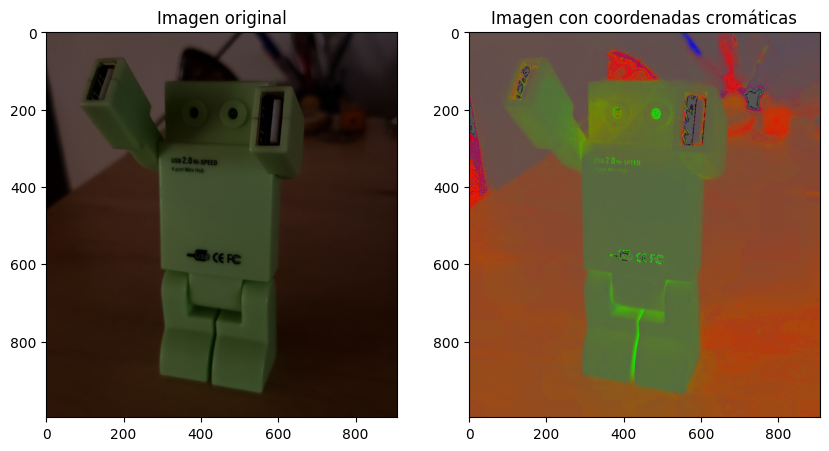

In [15]:
#IMAGEN 3
coor_cromaticas(img3)